In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000821127"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000821127
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,BOSTON PRIVATE FINANCIAL HOLDINGS INC
Ticker,BPFH


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,38.0,1.100526e+01,4.139555e+00,6.210000e+00,7.36,9.555000e+00,1.480750e+01,1.846000e+01
interest income,35.0,5.699629e+07,9.457623e+06,3.440300e+07,51826500.00,5.580200e+07,5.971250e+07,7.689200e+07
net income,66.0,6.087641e+06,3.699804e+07,-2.733610e+08,6495500.00,1.304400e+07,1.759550e+07,4.337700e+07
net interest income,67.0,4.299288e+07,1.148357e+07,1.630800e+07,43384500.00,4.478300e+07,4.987500e+07,5.999700e+07
provision for loan losses,61.0,5.424443e+06,1.910962e+07,-6.114000e+06,-1655000.00,9.870000e+05,3.738000e+06,1.371080e+08
total revenue,56.0,8.107157e+07,1.998401e+07,3.079600e+07,73789500.00,8.666500e+07,9.254650e+07,1.173290e+08


# Plots

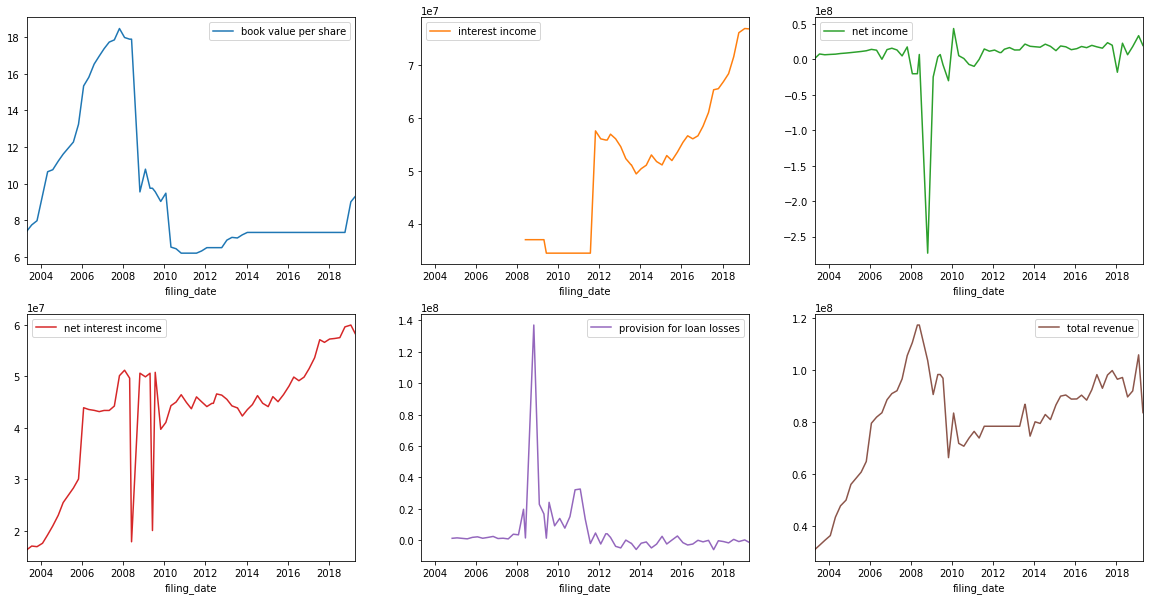

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000821127 book value per share                             2005Q1    missing   
           book value per share                             2008Q2    missing   
           book value per share        2010Q4 to 2011Q2: 3 periods    missing   
           book value per share        2012Q1 to 2012Q3: 3 periods    missing   
           book value per share       2014Q1 to 2018Q3: 19 periods    missing   
           interest income            2003Q1 to 2007Q4: 20 periods    missing   
           interest income             2008Q2 to 2008Q4: 3 periods    missing   
           interest income             2009Q2 to 2011Q2: 9 periods    missing   
           net income                                       2005Q1    missing   
           net income                                       2008Q2    missing   
           net income                                       2009Q1  duplicate   
           net interest income                              2005Q1    missing   
           net interest income                              2008Q1  duplicate   
           net interest income                              2008Q2    missing   
           net interest income                              2009Q1  duplicate   
           provision for loan losses   2003Q1 to 2004Q2: 6 periods    missing   
           provision for loan losses                        2005Q1    missing   
           provision for loan losses                        2008Q1  duplicate   
           provision for loan losses                        2008Q2    missing   
           provision for loan losses                        2009Q1  duplicate   
           total revenue                                    2005Q1    missing   
           total revenue                                    2008Q2    missing   
           total revenue               2011Q3 to 2013Q1: 7 periods    missing   

                                               message  
cik        item                                         
0000821127 book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           interest income              Missing period  
           interest income              Missing period  
           interest income              Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                 Duplicate period  
           net interest income          Missing period  
           net interest income        Duplicate period  
           net interest income          Missing period  
           net interest income        Duplicate period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           provision for loan losses  Duplicate period  
           provision for loan losses    Missing period  
           provision for loan losses  Duplicate period  
           total revenue                Missing period  
           total revenue                Missing period  
           total revenue                Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()